In [2]:
from duckduckgo_search import DDGS

with DDGS() as ddgs:
    results = ddgs.text("Hôm nay ngày mấy", max_results=5)

for r in results:
    print(r["title"])
    print(r["href"])
    print(r["body"])
    print("----")


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22812\2264493257.py:3: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


Lịch Âm Hôm Nay - Âm Lịch Hôm Nay - Xem Lịch Âm
https://www.xemlicham.com/
Nov 14, 2025 · Lịch âm 2025 ngày âm lịch hôm nay. Lịch vạn niên & xem ngày tốt xấu, ngày hoàng đạo. Ngày lễ âm lịch, dương lịch hôm nay. Chính xác nhất!
----
Đổi Ngày Dương Sang Âm - Xem Lịch Âm.com
https://www.xemlicham.com/app/doi-ngay-duong-sang-am
Nov 13, 2025 · Công cụ chuyển đổi ngày dương lịch sang âm lịch giúp bạn chuyển đổi nhanh ngày dương lịch bất kỳ sang ngày âm lịch tương ứng.
----
Lịch Âm 2025 - Lich Van Nien 2025 - Lịch 2025
https://www.xemlicham.com/am-lich/nam/2025
26/3: Ngày thành lập Đoàn TNCS Hồ Chí Minh. 1/4: Ngày Cá tháng Tư. 30/4: Ngày giải phóng miền Nam. 1/5: Ngày Quốc tế Lao động. 7/5: Ngày chiến thắng Điện Biên Phủ. 13/5: Ngày của mẹ. 19/5: …
----
Lịch Âm Tháng 9 Năm 2025 - Lịch Âm 9/2025 - Lich Van Nien 9/2025
https://www.xemlicham.com/am-lich/nam/2025/thang/9
Lịch âm tháng 9 năm 2025 hay lich van nien, nhằm tháng giáp thân năm ất tỵ âm lịch. Xem ngay tháng giáp thân để biết những ngà

In [3]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

question = "how many person?"
inputs = processor(raw_image, question, return_tensors="pt")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

1


Generated image: ...

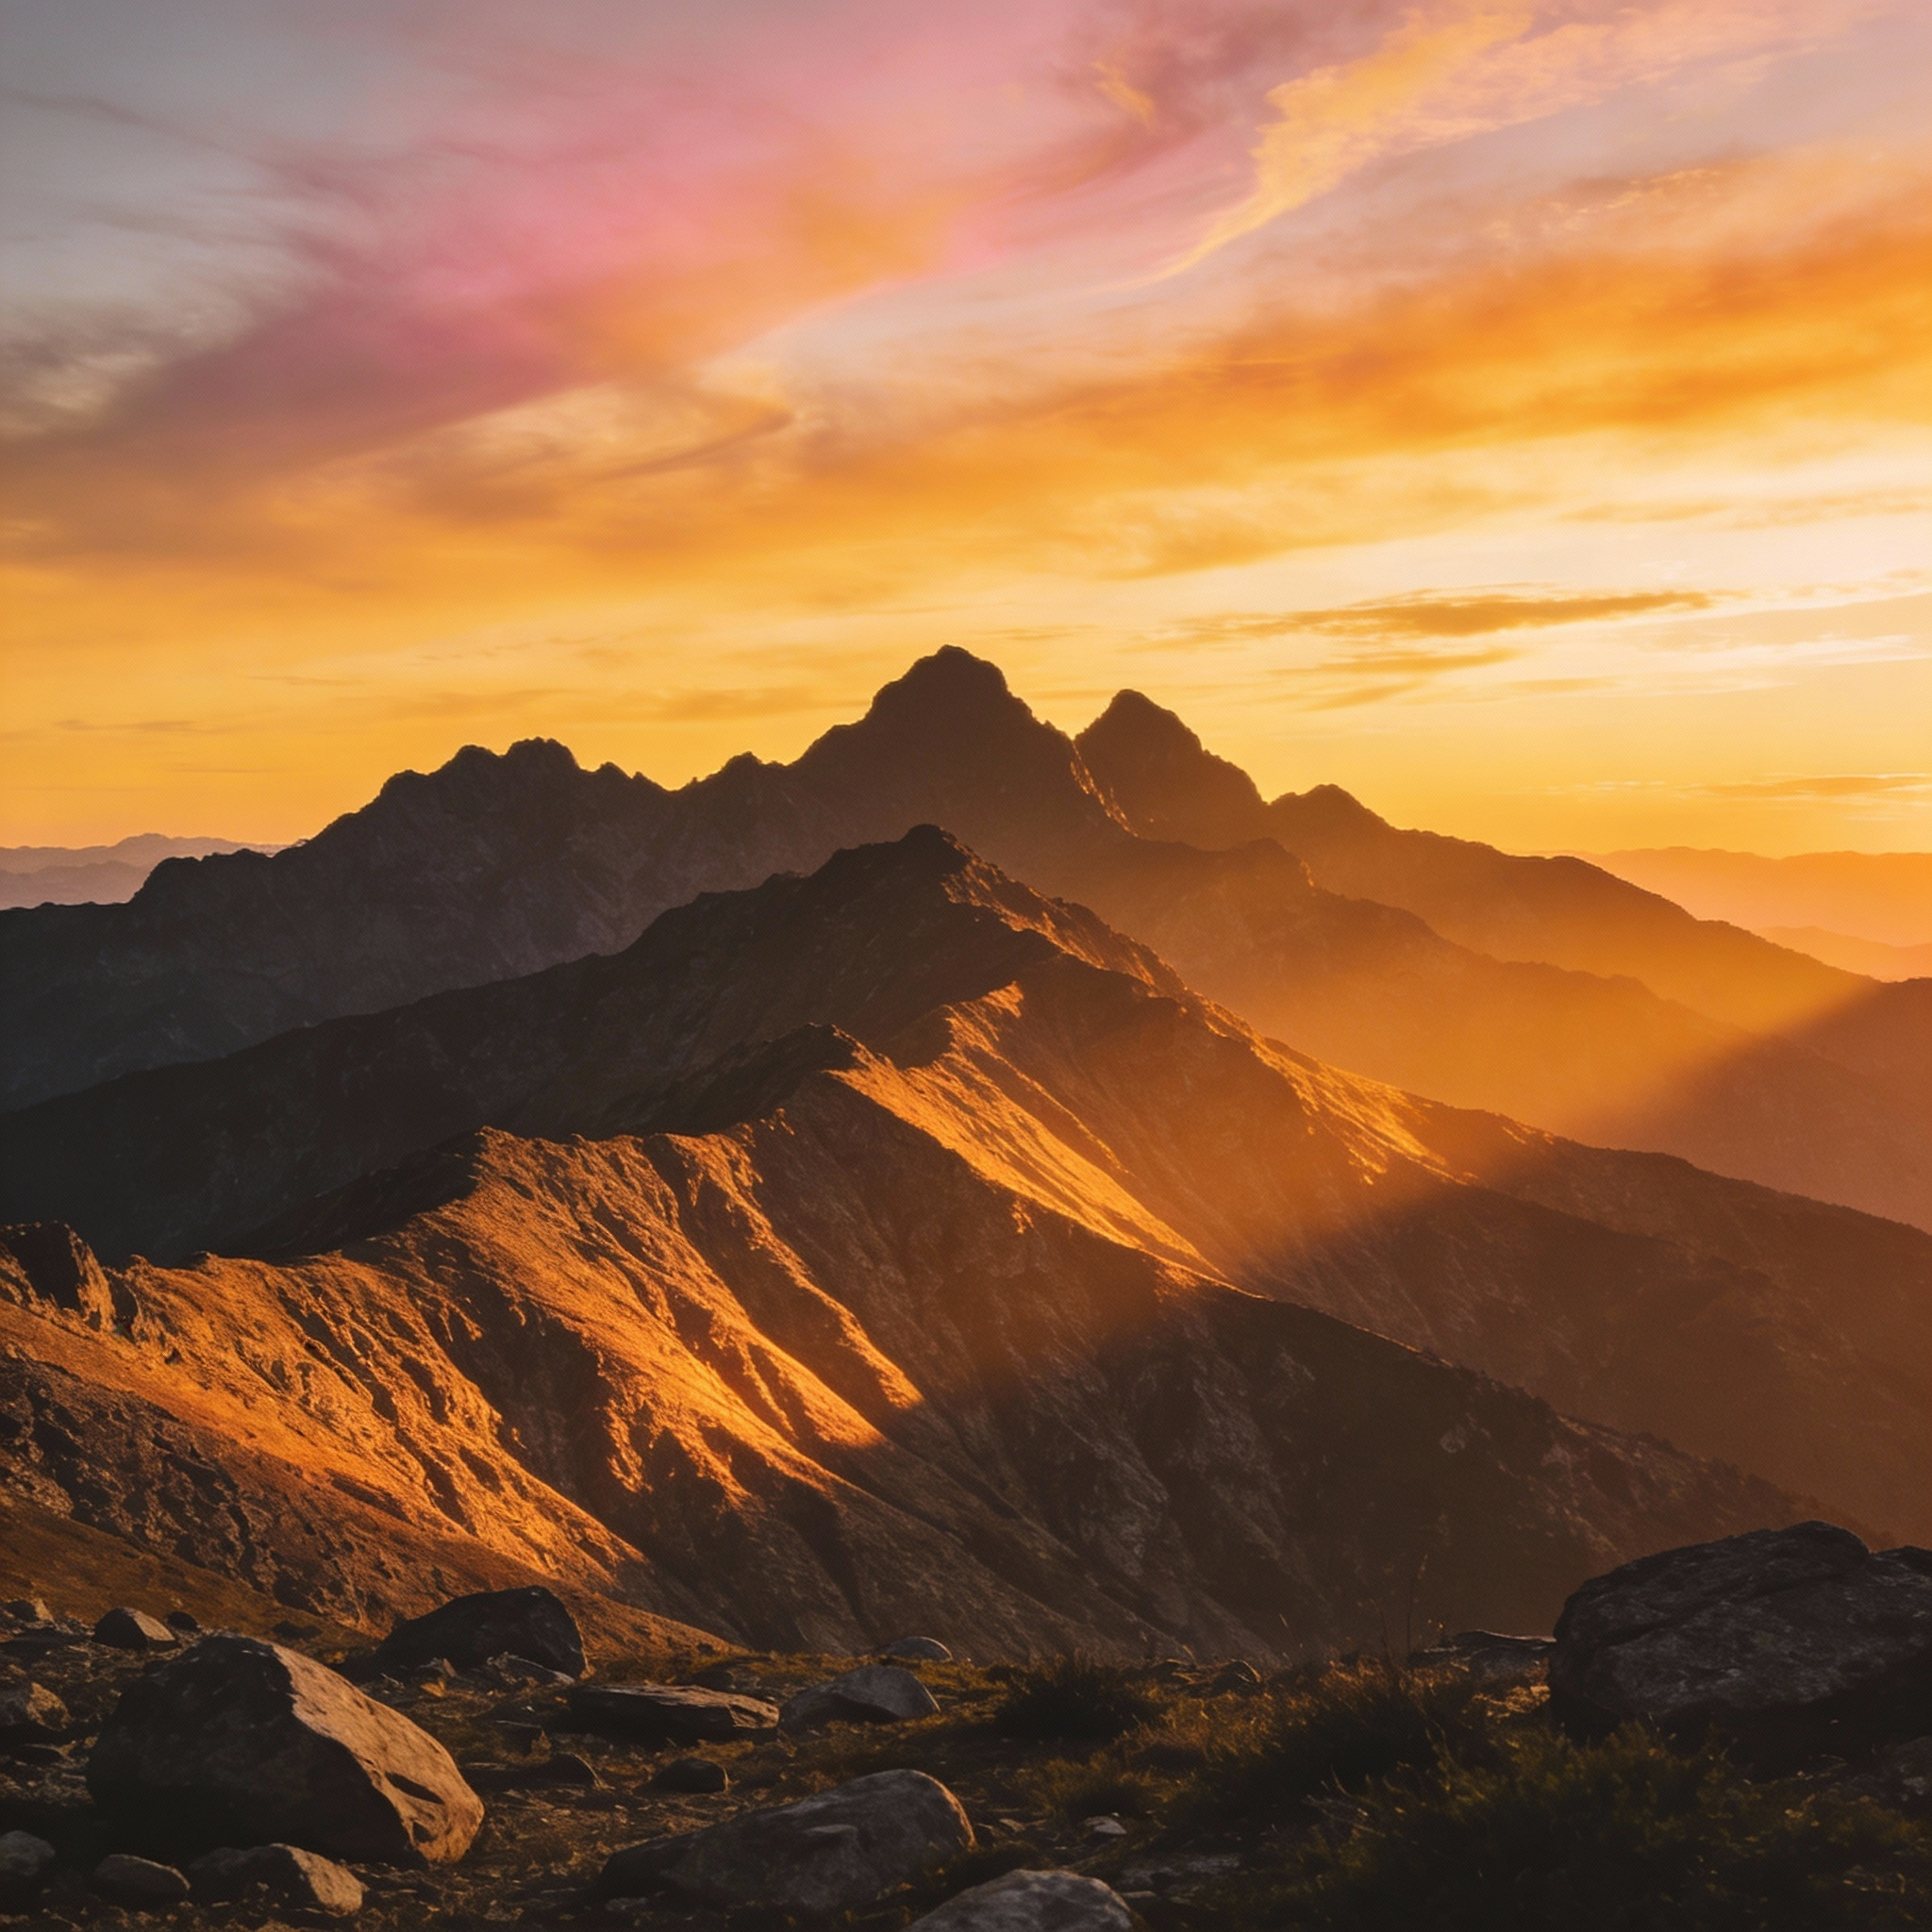

In [3]:
from openai import OpenAI

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)

# Generate an image
response = client.chat.completions.create(
  model="bytedance-seed/seedream-4.5",
  messages=[
          {
            "role": "user",
            "content": "Generate a beautiful sunset over mountains"
          }
        ],
  extra_body={"modalities": ["image", "text"]}
)

# The generated image will be in the assistant message
response = response.choices[0].message
if response.images:
  for image in response.images:
    image_url = image['image_url']['url']  # Base64 data URL
    print(f"Generated image: {image_url}...")

In [8]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database (actually this model is meant to be used on printed text)
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


InvalidSchema: No connection adapters were found for 'C:\\Users\\ADMIN\\Pictures\\Screenshots\\Screenshot 2026-01-05 122349.png'